In [0]:
# Importing necessary libraries for this project analysis

import pandas as pd # for data processing
import numpy as np # for numerical calculations

import seaborn as sns # for visualization
sns.set(style ='white', context = 'notebook', palette = 'deep')
import matplotlib.pyplot as plt # for plotting

import requests
from io import StringIO

import warnings
warnings.filterwarnings('ignore')

# sklearn libraries for data preprocessing and performance measures
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# import libraies for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# importing algorithms
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb

In [0]:
# Bias underfitting has not learned well
# Variance overfitting cannot generalize
# STANDARDIZE/ NORMALIZE DATA
# AM AND PM IN TIME
# CROSS VALIDATION STRATEGY
# LGBM
# HYPEROPT FOR BAYESIAN SEARCH
# STACKING MODELS
# MLXNET
# MEAN ENCODING 
# ORDER NUMBER CAN TELL SEASONS
# 

# Load data

In [0]:
# Loading Data

import requests
from io import StringIO

train = 'https://drive.google.com/file/d/1ZP9pFBATu38l97Tut5hKLvpzKRLFXX_P/view?usp=sharing'
test = 'https://drive.google.com/file/d/1_aElMoEIRs55avOafA7U1_YXEuaDBXLh/view?usp=sharing'
submission = 'https://drive.google.com/file/d/1mqXS8euMqF9_bhTEU6O9cLHoX2FI_5HD/view?usp=sharing'
dictionary = 'https://drive.google.com/file/d/1juqltwSs6OXQgJJEhTxD7Gm443fnLpCp/view?usp=sharing'
riders = 'https://drive.google.com/file/d/19-aVgAcKRxX_Tk9StUQMNeAUVi0ZTo9K/view?usp=sharing'

# hyperopt

def read_csv(url):
 url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
 csv_raw = requests.get(url).text
 csv = StringIO(csv_raw)
 return csv

train = pd.read_csv(read_csv(train))
test = pd.read_csv(read_csv(test))
sub = pd.read_csv(read_csv(submission))
dictionary = pd.read_csv(read_csv(dictionary))
riders = pd.read_csv(read_csv(riders))

In [0]:
test_copy = pd.read_csv('/content/SendyTest (1).csv')

In [0]:
test_copy.head()

# EDA

In [0]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [0]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
print(f'train: {train.shape} \n  test: {test.shape} \n riders: {riders.shape}')

train: (21201, 29) 
  test: (7068, 25) 
 riders: (960, 5)


In [0]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [0]:
dictionary

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [0]:
# checking for columns in train set and not in test set
for col in train.columns:
  if col not in test.columns:
    print(col)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


# Cleaning & Preprocessing

In [0]:
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [0]:
test.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [0]:
### https://medium.com/@joseph.magiya/clustering-gps-co-ordinates-forming-regions-4f50caa7e4a1##

Creating clusters

In [0]:
# from sklearn.cluster import KMeans

# sns.set(style = 'darkgrid')

# K_clusters = range(1,100)

# kmeans = [KMeans(n_clusters=i) for i in K_clusters]

# Y_axis = train[['Destination Lat']]
# X_axis = train[['Destination Long']]

# score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# # Visualize
# plt.plot(K_clusters, score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.xlim(1,40)
# plt.title('Elbow Curve')
# plt.show()


In [0]:
# TRAIN DATA

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 15, init ='k-means++')

kmeans.fit(train[['Destination Lat', 'Destination Long']]) # Compute k-means clustering.

train['Destination_cluster_label'] = kmeans.fit_predict(train[['Destination Lat', 'Destination Long']])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(train[['Destination Lat', 'Destination Long']]) # Labels of each point

train['Destination_cluster_label'] = train['Destination_cluster_label'].astype('category')

train.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Destination_cluster_label
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,2
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,2


In [0]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 15, init ='k-means++')

kmeans.fit(test[['Destination Lat', 'Destination Long']]) # Compute k-means clustering.

test['Destination_cluster_label'] = kmeans.fit_predict(test[['Destination Lat', 'Destination Long']])

centers2 = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels2 = kmeans.predict(test[['Destination Lat', 'Destination Long']]) # Labels of each point

test['Destination_cluster_label'] = test['Destination_cluster_label'].astype('category')

test.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Destination_cluster_label
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,8
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,2
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,2


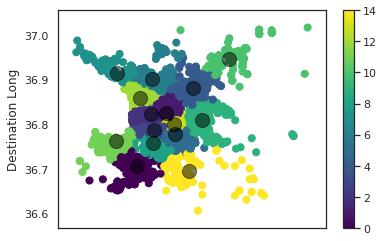

In [0]:
train.plot.scatter(x = 'Destination Lat'	, y = 'Destination Long', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()


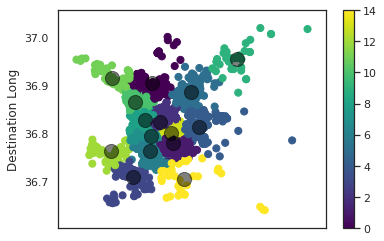

In [0]:
test.plot.scatter(x = 'Destination Lat'	, y = 'Destination Long', c=labels2, s=50, cmap='viridis')
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)

plt.show()

Fixing Messy column names

In [0]:
train.columns = train.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('=', '_')
train.columns = train.columns.str.replace('__', '_')
train.columns = train.columns.str.replace('(', '').str.replace(')', '')
train.columns = train.columns.str.replace('__', '_')
train.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type',
       'personal_or_business', 'placement_day_of_month',
       'placement_weekday_mo_1', 'placement_time', 'confirmation_day_of_month',
       'confirmation_weekday_mo_1', 'confirmation_time',
       'arrival_at_pickup_day_of_month', 'arrival_at_pickup_weekday_mo_1',
       'arrival_at_pickup_time', 'pickup_day_of_month', 'pickup_weekday_mo_1',
       'pickup_time', 'arrival_at_destination_day_of_month',
       'arrival_at_destination_weekday_mo_1', 'arrival_at_destination_time',
       'distance_km', 'temperature', 'precipitation_in_millimeters',
       'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long',
       'rider_id', 'time_from_pickup_to_arrival', 'destination_cluster_label'],
      dtype='object')

In [0]:
test.columns = test.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('=', '_')
test.columns = test.columns.str.replace('__', '_')
test.columns = test.columns.str.replace('(', '').str.replace(')', '')
test.columns = test.columns.str.replace('__', '_')
test.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type',
       'personal_or_business', 'placement_day_of_month',
       'placement_weekday_mo_1', 'placement_time', 'confirmation_day_of_month',
       'confirmation_weekday_mo_1', 'confirmation_time',
       'arrival_at_pickup_day_of_month', 'arrival_at_pickup_weekday_mo_1',
       'arrival_at_pickup_time', 'pickup_day_of_month', 'pickup_weekday_mo_1',
       'pickup_time', 'distance_km', 'temperature',
       'precipitation_in_millimeters', 'pickup_lat', 'pickup_long',
       'destination_lat', 'destination_long', 'rider_id',
       'destination_cluster_label'],
      dtype='object')

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 15, init ='k-means++')
kmeans.fit(train[['pickup_lat', 'pickup_long']]) # Compute k-means clustering.
train['pickup_cluster_label'] = kmeans.fit_predict(train[['pickup_lat', 'pickup_long']])
centers1 = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels1 = kmeans.predict(train[['pickup_lat', 'pickup_long']]) # Labels of each point
train['pickup_cluster_label'] = train['pickup_cluster_label'].astype('category')


In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 15, init ='k-means++')
kmeans.fit(test[['pickup_lat', 'pickup_long']]) # Compute k-means clustering.
test['pickup_cluster_label'] = kmeans.fit_predict(test[['pickup_lat', 'pickup_long']])
centers3 = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels3 = kmeans.predict(test[['pickup_lat', 'pickup_long']]) # Labels of each point
test['pickup_cluster_label'] = test['pickup_cluster_label'].astype('category')

In [0]:
# #Forward Fill Temperature Column

train['temperature'].fillna(train['temperature'].mean(), inplace= True)

# #Filling in the Precipitation column with 0

train['precipitation_in_millimeters'].fillna(0, inplace= True)

In [0]:
# #Forward Fill Temperature Column

test['temperature'].fillna(test['temperature'].mean(), inplace= True)

# #Filling in the Precipitation column with 0

test['precipitation_in_millimeters'].fillna(0, inplace= True)



# YYYYYYY



In [0]:
train.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,arrival_at_pickup_time,pickup_day_of_month,pickup_weekday_mo_1,pickup_time,arrival_at_destination_day_of_month,arrival_at_destination_weekday_mo_1,arrival_at_destination_time,distance_km,temperature,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,destination_cluster_label,pickup_cluster_label
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,2,5
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2,7
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,2,5
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,13,2
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2,8


In [0]:
time_cols = ['placement_time', 'confirmation_time', 'arrival_at_pickup_time', 'pickup_time', 'arrival_at_destination_time']
for col in time_cols:
  train[col] = pd.to_datetime(train[col])
  train[col.split('_')[0] + '_hour'] = train[col].dt.hour
  train[col.split('_')[0] + '_minute'] = train[col].dt.minute
  train[col] = [time.time() for time in train[col]]

In [0]:
test.head(2)

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,arrival_at_pickup_time,pickup_day_of_month,pickup_weekday_mo_1,pickup_time,distance_km,temperature,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,destination_cluster_label,pickup_cluster_label
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,23.24612,0.0,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,8,14
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,23.24612,0.0,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,2,0


In [0]:
test.dtypes

order_no                            object
user_id                             object
vehicle_type                        object
platform_type                        int64
personal_or_business                object
placement_day_of_month               int64
placement_weekday_mo_1               int64
placement_time                      object
confirmation_day_of_month            int64
confirmation_weekday_mo_1            int64
confirmation_time                   object
arrival_at_pickup_day_of_month       int64
arrival_at_pickup_weekday_mo_1       int64
arrival_at_pickup_time              object
pickup_day_of_month                  int64
pickup_weekday_mo_1                  int64
pickup_time                         object
distance_km                          int64
temperature                        float64
precipitation_in_millimeters       float64
pickup_lat                         float64
pickup_long                        float64
destination_lat                    float64
destination

# PROBE

In [0]:
time_cols = ['placement_time', 'confirmation_time', 'arrival_at_pickup_time', 'pickup_time']
for col in time_cols:
  test[col] = pd.to_datetime(test[col])
  test[col.split('_')[0] + '_hour'] = test[col].dt.hour
  test[col.split('_')[0] + '_minute'] = test[col].dt.minute
  test[col] = [time.time() for time in test[col]]

In [0]:
hour_cols = ['placement_hour',    'confirmation_hour',    'arrival_hour',    'pickup_hour']

for col in hour_cols:
  train[col.split('_')[0] + '_ap'] = train[col].apply(lambda x: 1 if( x >= 7 & x <= 17) else 0)

In [0]:
hour_cols = ['placement_hour',    'confirmation_hour',    'arrival_hour',    'pickup_hour']

for col in hour_cols:
  test[col.split('_')[0] + '_ap'] = test[col].apply(lambda x: 1 if( x >= 7 & x <= 17) else 0)

In [0]:
train.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,arrival_at_pickup_time,pickup_day_of_month,pickup_weekday_mo_1,pickup_time,arrival_at_destination_day_of_month,arrival_at_destination_weekday_mo_1,arrival_at_destination_time,distance_km,temperature,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,destination_cluster_label,pickup_cluster_label,placement_hour,placement_minute,confirmation_hour,confirmation_minute,arrival_hour,arrival_minute,pickup_hour,pickup_minute,placement_ap,confirmation_ap,arrival_ap,pickup_ap
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,2,5,9,35,9,40,10,39,10,27,1,1,1,1
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16,12,5,11:23:21,12,5,11:40:22,12,5,11:44:09,12,5,12:17:22,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2,7,11,16,11,23,12,17,11,44,1,1,1,1
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25,30,2,12:42:44,30,2,12:49:34,30,2,12:53:03,30,2,13:00:38,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,2,5,12,39,12,42,13,0,12,53,1,1,1,1
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,09:25:34,15,5,09:26:05,15,5,09:37:56,15,5,09:43:06,15,5,10:05:27,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,13,2,9,25,9,26,10,5,9,43,1,1,1,1
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,09:55:18,13,1,09:56:18,13,1,10:03:53,13,1,10:05:23,13,1,10:25:37,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2,8,9,55,9,56,10,25,10,5,1,1,1,1


In [0]:
test.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,arrival_at_pickup_time,pickup_day_of_month,pickup_weekday_mo_1,pickup_time,distance_km,temperature,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,destination_cluster_label,pickup_cluster_label,placement_hour,placement_minute,confirmation_hour,confirmation_minute,arrival_hour,arrival_minute,pickup_hour,pickup_minute,placement_ap,confirmation_ap,arrival_ap,pickup_ap
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,16:44:10,27,3,16:44:29,27,3,16:53:04,27,3,17:06:47,8,23.24612,0.0,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,8,14,16,44,16,44,16,53,17,6,1,1,1,1
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35,17,5,12:59:17,17,5,13:20:27,17,5,13:25:37,5,23.24612,0.0,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,2,0,12,57,12,59,13,20,13,25,1,1,1,1
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14,27,4,11:25:05,27,4,11:33:20,27,4,11:57:54,5,22.80000,0.0,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,2,7,11,8,11,25,11,33,11,57,1,1,1,1
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,13:51:35,17,1,13:53:27,17,1,14:02:41,17,1,14:16:52,5,24.50000,0.0,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,7,7,13,51,13,53,14,2,14,16,1,1,1,1
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28,11,2,11:34:45,11,2,11:47:19,11,2,11:56:04,6,24.40000,0.0,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,13,7,11,30,11,34,11,47,11,56,1,1,1,1


In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['personal_or_business'] = le.fit_transform(train['personal_or_business'])

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test['personal_or_business'] = le.fit_transform(test['personal_or_business'])

In [0]:
cols_to_drop = ['user_id','vehicle_type', 'confirmation_time', 'arrival_at_pickup_time','pickup_time','placement_time',
                'arrival_at_destination_day_of_month', 'arrival_at_destination_weekday_mo_1', 'arrival_at_destination_time','rider_id', 'order_no']

train.drop(cols_to_drop, inplace = True, axis = 1)
               
cols_to_category = ['platform_type']

In [0]:
# checking for columns in train set and not in test set
for col in train.columns:
  if col not in test.columns:
    print(col)

time_from_pickup_to_arrival


In [0]:
cols_to_drop = ['user_id','vehicle_type', 'confirmation_time', 'arrival_at_pickup_time','pickup_time','placement_time','rider_id','order_no']

test.drop(cols_to_drop, inplace = True, axis = 1)
               
cols_to_category = ['platform_type']

In [0]:

train['distance_km']=train['distance_km'].astype(int)
train['platform_type'] = train['platform_type'].astype('category')

In [0]:

test['distance_km']=test['distance_km'].astype(int)
test['platform_type'] = test['platform_type'].astype('category')

In [0]:
train.dtypes

platform_type                     category
personal_or_business                 int64
placement_day_of_month               int64
placement_weekday_mo_1               int64
confirmation_day_of_month            int64
confirmation_weekday_mo_1            int64
arrival_at_pickup_day_of_month       int64
arrival_at_pickup_weekday_mo_1       int64
pickup_day_of_month                  int64
pickup_weekday_mo_1                  int64
distance_km                          int64
temperature                        float64
precipitation_in_millimeters       float64
pickup_lat                         float64
pickup_long                        float64
destination_lat                    float64
destination_long                   float64
time_from_pickup_to_arrival          int64
destination_cluster_label         category
pickup_cluster_label              category
placement_hour                       int64
placement_minute                     int64
confirmation_hour                    int64
confirmatio

In [0]:
test.dtypes

platform_type                     category
personal_or_business                 int64
placement_day_of_month               int64
placement_weekday_mo_1               int64
confirmation_day_of_month            int64
confirmation_weekday_mo_1            int64
arrival_at_pickup_day_of_month       int64
arrival_at_pickup_weekday_mo_1       int64
pickup_day_of_month                  int64
pickup_weekday_mo_1                  int64
distance_km                          int64
temperature                        float64
precipitation_in_millimeters       float64
pickup_lat                         float64
pickup_long                        float64
destination_lat                    float64
destination_long                   float64
destination_cluster_label         category
pickup_cluster_label              category
placement_hour                       int64
placement_minute                     int64
confirmation_hour                    int64
confirmation_minute                  int64
arrival_hou

In [0]:
train.head()

,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,confirmation_day_of_month,confirmation_weekday_mo_1,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,pickup_day_of_month,pickup_weekday_mo_1,distance_km,temperature,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival,destination_cluster_label,pickup_cluster_label,placement_hour,placement_minute,confirmation_hour,confirmation_minute,arrival_hour,arrival_minute,pickup_hour,pickup_minute,placement_ap,confirmation_ap,arrival_ap,pickup_ap
0,3,0,9,5,9,5,9,5,9,5,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,745,2,5,9,35,9,40,10,39,10,27,1,1,1,1
1,3,1,12,5,12,5,12,5,12,5,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,1993,2,7,11,16,11,23,12,17,11,44,1,1,1,1
2,3,0,30,2,30,2,30,2,30,2,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,455,2,5,12,39,12,42,13,0,12,53,1,1,1,1
3,3,0,15,5,15,5,15,5,15,5,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,1341,13,2,9,25,9,26,10,5,9,43,1,1,1,1
4,1,1,13,1,13,1,13,1,13,1,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,1214,2,8,9,55,9,56,10,25,10,5,1,1,1,1


In [0]:
test.head()

,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,confirmation_day_of_month,confirmation_weekday_mo_1,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,pickup_day_of_month,pickup_weekday_mo_1,distance_km,temperature,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,destination_cluster_label,pickup_cluster_label,placement_hour,placement_minute,confirmation_hour,confirmation_minute,arrival_hour,arrival_minute,pickup_hour,pickup_minute,placement_ap,confirmation_ap,arrival_ap,pickup_ap
0,3,0,27,3,27,3,27,3,27,3,8,23.24612,0.0,-1.333275,36.870815,-1.305249,36.822390,8,14,16,44,16,44,16,53,17,6,1,1,1,1
1,3,0,17,5,17,5,17,5,17,5,5,23.24612,0.0,-1.272639,36.794723,-1.277007,36.823907,2,0,12,57,12,59,13,20,13,25,1,1,1,1
2,3,0,27,4,27,4,27,4,27,4,5,22.80000,0.0,-1.290894,36.822971,-1.276574,36.851365,2,7,11,8,11,25,11,33,11,57,1,1,1,1
3,3,0,17,1,17,1,17,1,17,1,5,24.50000,0.0,-1.290503,36.809646,-1.303382,36.790658,7,7,13,51,13,53,14,2,14,16,1,1,1,1
4,3,0,11,2,11,2,11,2,11,2,6,24.40000,0.0,-1.281081,36.814423,-1.266467,36.792161,13,7,11,30,11,34,11,47,11,56,1,1,1,1


# MODELING

In [0]:
X = train.drop('time_from_pickup_to_arrival', axis = 1)

X= pd.get_dummies(X)

y = train.time_from_pickup_to_arrival

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16960, 62) (4241, 62) (16960,) (4241,)


In [0]:
rs = 3
kfold = KFold(n_splits=10, random_state=rs, shuffle=True)

regressors = []
regressors.append(SVR())
regressors.append(GradientBoostingRegressor(random_state=rs))
regressors.append(ExtraTreesRegressor(n_estimators=rs))
regressors.append(RandomForestRegressor(random_state=rs))
regressors.append(XGBRegressor(random_state=rs, objective="reg:squarederror"))
regressors.append(LGBMRegressor(random_state=rs))

cv_results = []
for regressor in regressors:     #scores to be minimised are negated (neg)
    cv_results.append(np.sqrt(abs(cross_val_score(regressor, X_train, y=y_train, scoring='neg_mean_squared_error', cv=kfold))))

cv_means = []
cv_stds = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_stds.append(cv_result.std())
    
cv_res = pd.DataFrame({ 
    "Algorithm": ["SVR", "GBR", "EXR", "RFR", "XGBR", "LGBM"],
    "CrossValMeans": cv_means, "CrossValErrors": cv_stds
                       })
cv_res = cv_res.sort_values("CrossValMeans", ascending=True)
print(cv_res)

  Algorithm  CrossValMeans  CrossValErrors
5      LGBM     426.252418       29.149789
1       GBR     651.761376       23.734074
4      XGBR     651.962829       25.652326
3       RFR     686.217414       34.417992
2       EXR     832.021194       27.322973
0       SVR     995.840152       30.411585


In [0]:
params = {
    'n_estimators':[75], # [75, 95],
    'num_leaves': [15], #[12,15, 17],
    'reg_alpha': [0.02], #[0.02, 0.05],
    'min_data_in_leaf': [300],  #[250, 280, 300]
    'learning_rate': [0.1], #[0.05, 0.1, 0.25],
    'objective': ['regression'] #['regression', None]
    }

lsearch = GridSearchCV(estimator = LGBMRegressor(random_state=rs), cv=kfold,scoring='neg_mean_squared_error', param_grid=params)
lgbm = lsearch.fit(X_train, y_train)

l_params = lgbm.best_params_
l_score = np.sqrt(abs(lgbm.best_score_))
print(lgbm.best_params_, np.sqrt(abs(lgbm.best_score_)))

#try: RandomSearch, hyperopt (bayesian)

{'learning_rate': 0.1, 'min_data_in_leaf': 300, 'n_estimators': 75, 'num_leaves': 15, 'objective': 'regression', 'reg_alpha': 0.02} 607.492472103269


Text(0.5, 1.0, ' LGBM feature importance')

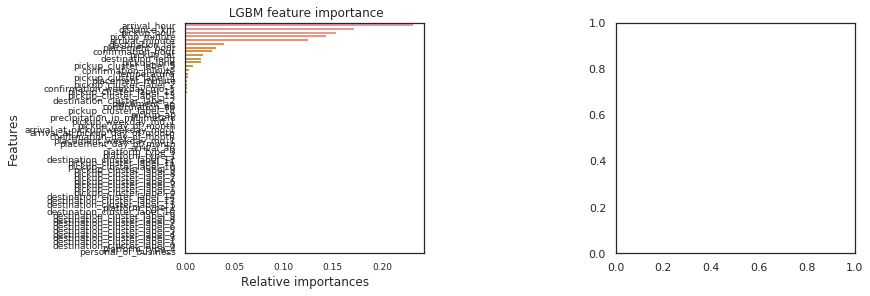

In [0]:
vals = lgbm.best_estimator_.feature_importances_
l_importance = np.array([ val/sum(vals) for val in vals ])

features = X.columns

feats = np.array(features)

fig,axes = plt.subplots(1,2, figsize=(12, 8))
plt.subplots_adjust(top=0.6, bottom=0.2, hspace=.6, wspace=0.8)

indices = np.argsort(l_importance)[::-1]
g = sns.barplot(y=feats[indices], x=l_importance[indices], orient='h', ax=axes[0])
g.set_xlabel("Relative importances", fontsize=12)
g.set_ylabel("Features", fontsize=12)
g.tick_params(labelsize=9)
g.set_title(" LGBM feature importance")


In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, n_jobs=-1, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generating a plot of test and training learning curve"""
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Trainig examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error', shuffle=True)
    
    #scores - 5 runs, each with 10 fold
    train_scores_mean = -np.mean(train_scores, axis=1) #5 means (each size)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r' )
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    
    plt.legend(loc='best')
    return plt

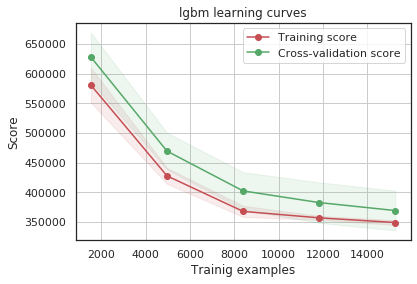

In [0]:
#Learning Curves

g = plot_learning_curve(lgbm.best_estimator_, "lgbm learning curves", X_train, y_train, cv=kfold)



In [0]:
import lightgbm as lgb

In [0]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lparams = {
           'learning_rate': 0.1, 'min_data_in_leaf': 300, 
           'n_estimators': 75, 'num_leaves': 15, 'random_state':rs,
           'objective': 'regression', 'reg_alpha': 0.02,
          'feature_fraction': 0.9, 'bagging_fraction':0.9}


lgbm = lgb.train(lparams, lgb_train, valid_sets=lgb_eval, num_boost_round=20, early_stopping_rounds=20)

lpred = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)

print("The RMSE of prediction is ", mean_squared_error(y_test, lpred)**0.5)

[1]	valid_0's l2: 959787
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 907607
[3]	valid_0's l2: 864790
[4]	valid_0's l2: 830236
[5]	valid_0's l2: 801913
[6]	valid_0's l2: 776500
[7]	valid_0's l2: 756546
[8]	valid_0's l2: 738906
[9]	valid_0's l2: 725633
[10]	valid_0's l2: 714086
[11]	valid_0's l2: 702387
[12]	valid_0's l2: 693664
[13]	valid_0's l2: 685645
[14]	valid_0's l2: 677956
[15]	valid_0's l2: 671972
[16]	valid_0's l2: 666159
[17]	valid_0's l2: 655192
[18]	valid_0's l2: 645810
[19]	valid_0's l2: 636588
[20]	valid_0's l2: 630575
[21]	valid_0's l2: 621580
[22]	valid_0's l2: 613939
[23]	valid_0's l2: 603647
[24]	valid_0's l2: 593044
[25]	valid_0's l2: 590072
[26]	valid_0's l2: 580299
[27]	valid_0's l2: 573402
[28]	valid_0's l2: 566085
[29]	valid_0's l2: 559508
[30]	valid_0's l2: 554108
[31]	valid_0's l2: 546892
[32]	valid_0's l2: 536924
[33]	valid_0's l2: 530101
[34]	valid_0's l2: 523866
[35]	valid_0's l2: 518403
[36]	valid_0's l2: 513235
[37]	valid_

# Making a submission

In [0]:
test = pd.get_dummies(test)

In [0]:
lgbm_y = lgbm.predict(test, num_iteration=lgbm.best_iteration)
lgbm_output = pd.DataFrame({"Order_No":test_copy['Order No'], 
                           "Time from Pickup to Arrival": lgbm_y })
lgbm_output.to_csv("submission_two.csv", index=False)

In [0]:
df = pd.read_csv('submission_two.csv')

In [0]:
df

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,2536.291009
1,Order_No_12736,1108.723603
2,Order_No_768,1185.415419
3,Order_No_15332,1398.377445
4,Order_No_21373,1169.157529
...,...,...
7063,Order_No_3612,1471.044189
7064,Order_No_7657,2573.387507
7065,Order_No_1969,1366.193729
7066,Order_No_10591,2284.668953
